In [33]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [35]:
# MNIST Veri Setinin Keras Kütüphanesi üzerinden yüklenmesi

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [37]:
# Veri Ön işleme - Adım 1 - Görüntülerin yeniden boyutlandırılması
x_train = x_train.reshape(-1, 28, 28, 1) # -1: Görüntünün toplam sayısı
x_test = x_test.reshape(-1, 28, 28, 1)

# Veri Ön işleme - Adım 2 - Görüntülerin Normalize edilmesi
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Eğitim (Train) Verilerinin Sayısı ve Boyutu = {x_train.shape}")
print(f"Test Verilerinin Sayısı ve Boyutu = {x_test.shape}")

Eğitim (Train) Verilerinin Sayısı ve Boyutu = (60000, 28, 28, 1)
Test Verilerinin Sayısı ve Boyutu = (10000, 28, 28, 1)


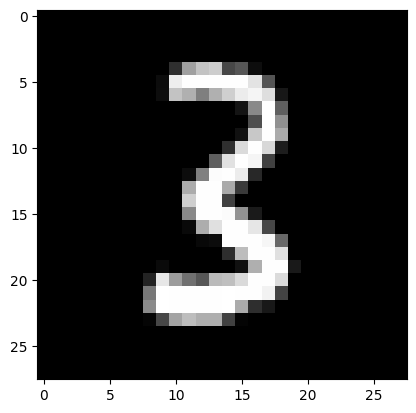

In [39]:
# Çıkış verisi olarak bu girdi görüntülerinin hangi rakamı temsil ettiğini
# gösteren y verilerini düzenliyoruz

plt.imshow(x_train[50000],cmap="gray")

In [41]:
y_train[50000]

np.uint8(3)

In [43]:
# One-hot Encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [45]:
y_train[50000]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [47]:
# Eğitim verilerinin %20'sinin doğrulama (validation) verisi olarak ayrılması
# Literatürde Data-Split işlemi denilir
# Bu işlem genellikle sklear altındaki train_test_split fonksiyonu ile yapılır

X_train, X_val, y_train_split, y_val = train_test_split(
    x_train, y_train, 
    test_size=0.2, # validasyon verisi yüzde kaç olacak bilgisi burada
    random_state = 42, # rastgelelik işlemini biraz sınırlı tutuyoruz
    stratify = y_train # rastgele şekilde dağılım yaparken sınıf dengesini korur
)

In [53]:
from keras.layers import Input

model = keras.Sequential([
    # Input katmanını ekliyoruz
    Input(shape=(28, 28, 1)),

    # CNN ilk blok
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    # CNN ikinci blok
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),

    # Yapay sinir ağı katmanları
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax') # Çıktı katmanı
])


In [55]:
# Modeli Derliyoruz

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [61]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'mnist_classification_cnn_model.keras',  # .h5 yerine .keras kullanıyoruz
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


In [63]:
# Modelimizi eğitiyoruz (.fit fonksiyonu ile)
with tf.device('/GPU:0'):
    history = model.fit(X_train, y_train_split, validation_data=(X_val, y_val),
                       batch_size=128, epochs=10, callbacks=model_checkpoint)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8707 - loss: 0.4489
Epoch 1: val_accuracy improved from -inf to 0.29658, saving model to mnist_classification_cnn_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.8709 - loss: 0.4482 - val_accuracy: 0.2966 - val_loss: 3.1004
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9781 - loss: 0.0702
Epoch 2: val_accuracy improved from 0.29658 to 0.98733, saving model to mnist_classification_cnn_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9781 - loss: 0.0701 - val_accuracy: 0.9873 - val_loss: 0.0433
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9840 - loss: 0.0494
Epoch 3: val_accuracy improved from 0.98733 to 0.98800, saving model to mnist_classification_cnn_model.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 41ms/step - accuracy: 0.9840 - loss: 0.0494 - val_accuracy: 0.9880 - val_loss: 0.0398
Epoch 4/10
374/375 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc

In [67]:
print("Test işlemi için Değerlendirme yapılıyor")

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Modelin Loss Performansı = {test_loss}")
print(f"Modelin Accuracy (Doğruluk Başarısı) Performansı = {test_accuracy}")

Test işlemi için Değerlendirme yapılıyor
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9896 - loss: 0.0353
Modelin Loss Performansı = 0.030855149030685425
Modelin Accuracy (Doğruluk Başarısı) Performansı = 0.991100013256073


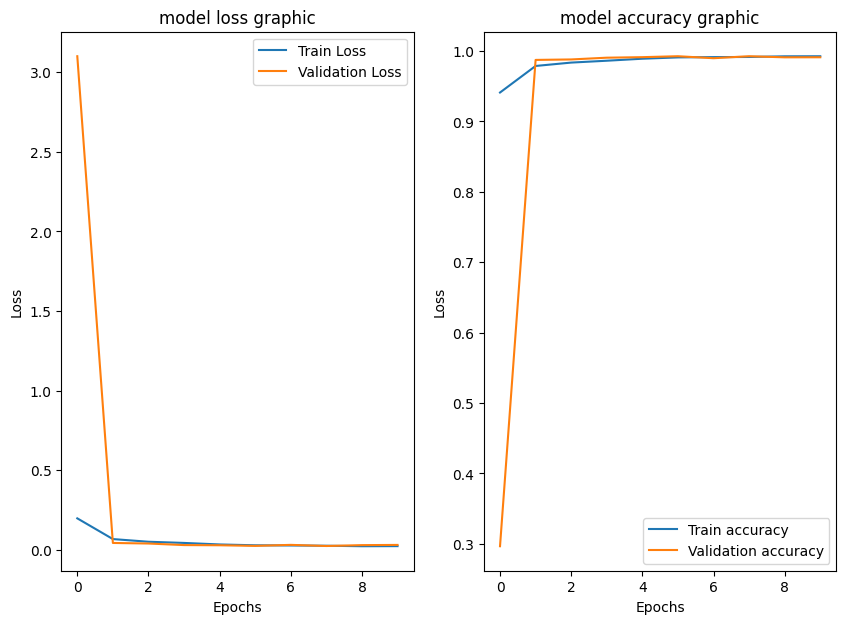

In [74]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.title('model loss graphic')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('model accuracy graphic')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [85]:
!pip install scikit-learn


In [92]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(x_test)

y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

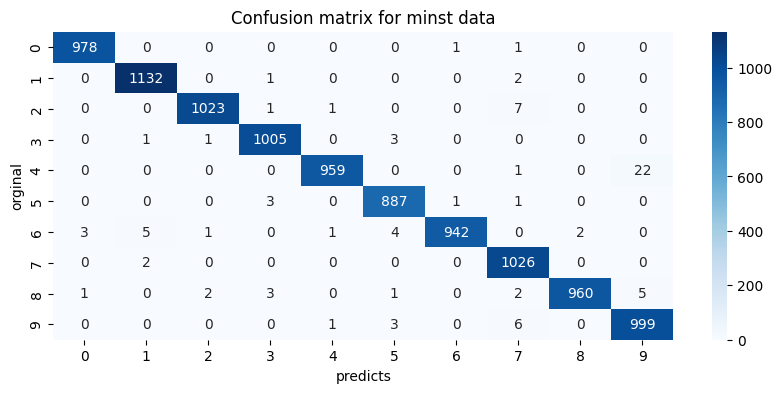

In [98]:
cm=confusion_matrix(y_test_class,y_pred_class)
plt.figure(figsize=(10,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion matrix for minst data')
plt.xlabel("predicts")
plt.ylabel("orginal")
plt.show